In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.init import xavier_normal_

from torchvision import transforms
from torchvision.datasets.mnist import MNIST

from pytoune.framework import Model
from pytoune.layers import Flatten

import livelossplot

In [2]:
# data loading
train_dataset = MNIST('./tmp/mnist/', train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST('./tmp/mnist/', train=False, download=True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

In [3]:
def init_module(module):
    for m in module.modules():
        if isinstance(m, nn.Linear):
            xavier_normal_(m.weight.data, 1)
            m.bias.data.zero_()

In [4]:
torch.manual_seed(42)
module = nn.Sequential(
    Flatten(),
    nn.Linear(28*28, 10),
)
init_module(module)

optimizer = optim.Adam(module.parameters())
model = Model(module, optimizer, nn.CrossEntropyLoss(), metrics=['accuracy'])
if torch.cuda.is_available():
    model.cuda(1)

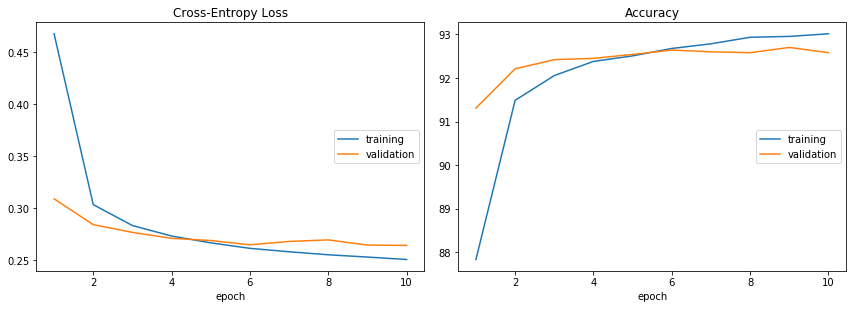

In [5]:
plot_losses = livelossplot.PlotLossesPytoune(metric2title={'loss': 'Cross-Entropy Loss', 'acc':'Accuracy'})
history = model.fit_generator(train_loader, test_loader,
                              epochs=10,
                              callbacks=[plot_losses],
                              verbose=False)